In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9):
      print("\nReached 90% accuracy, so cancelling training !")
      self.model.stop_training = True

In [ ]:
callbacks = myCallBack()
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL : 0

IMAGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 16

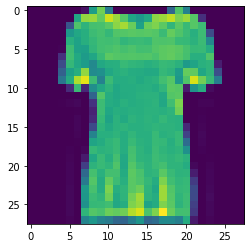

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 10

# Set the number of characters per roe when printing
np.set_printoptions(linewidth=320)

#print the label and image
print(f'LABEL : {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY: \n {training_images[index]}')

# Visualise the image
plt.imshow(training_images[index])

In [ ]:
# Normalise the pixel values of the train and test images
training_images = training_images /  255.0
test_images = test_images / 255.0

In [ ]:
# Build a classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)])

In [ ]:
# Declare the sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs : {sum}')

# Get the index with the highest value
prediction = np.argmax(outputs)
print(f'class with highesst probability: {prediction}')

input to softmax function : [[1. 3. 4. 2.]]
output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs : 1.0
class with highesst probability: 2


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - ETA: 0s - loss: 0.2568 - accuracy: 0.9046
Reached 95% accuracy, so cancelling training !
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9046


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8747


[0.35690274834632874, 0.8747000098228455]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[1.7544649e-05 1.4109745e-11 2.2049424e-07 1.7249835e-08 3.5967469e-07 1.6582325e-03 3.0841489e-05 5.5937190e-02 1.3617632e-05 9.4234204e-01]
9
